In [93]:
import pandas as pd
import emoji

In [94]:
df = pd.read_csv(r"Sarcasm Dataset.csv")
df

,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN
3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN
3465,I'm finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN
3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
import re
import emoji

def preprocess_text(text):
    """
    Preprocesses text by removing URLs, emails, emojis, extra whitespace,
    hashtags, and specific characters. Also replaces "iâ€™m" with "i am".

    Args:
        text: The input text string.

    Returns:
        The preprocessed text string.
    """

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove emails
    text = re.sub(r'[a-z0-9]+@[a-z]+\.[a-z]{2,}', '', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace="")

    # Remove specific characters
    text = re.sub(r'[¯\_(ãƒ„)_/Â¯]', '', text)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Replace "iâ€™m" with "i am"
    text = re.sub(r'i\s*â€™m', 'i am', text, flags=re.IGNORECASE)

    # Lowercasing
    text = text.lower()

    # Extra white space
    text = re.sub(r'\s+', ' ', text)

    # Remove hashtags (if you only want to remove the "#" symbol)
    text = re.sub(r'#', '', text)

    return text



In [96]:
df['tweet'].isna().sum()
df['tweet'].fillna('', inplace=True)

In [97]:
df['tweet'] = df['tweet'].astype(str)

In [98]:
df['cleaned_tweet'] = df['tweet'].apply(lambda x: preprocess_text(x))

In [99]:
df['cleaned_tweet']

0       the only thing i got from college is a caffein...
1       i love it when professors draw a big question ...
2       remember the hundred emails from companies whe...
3       today my pop-pop told me i was not “forced” to...
4        i did too, and i also reported cancun cruz no...
                              ...                        
3463    the population spike in chicago in 9 months is...
3464    you'd think in the second to last english clas...
3465    i'm finally surfacing after a holiday to scotl...
3466    couldn't be prouder today. well done to every ...
3467    overheard as my 13 year old games with a frien...
Name: cleaned_tweet, Length: 3468, dtype: object

In [100]:
df.shape

(3468, 9)

In [101]:
df.head()

,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,cleaned_tweet
0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0,the only thing i got from college is a caffein...
1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0,i love it when professors draw a big question ...
2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0,remember the hundred emails from companies whe...
3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0,today my pop-pop told me i was not “forced” to...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0,"i did too, and i also reported cancun cruz no..."


In [102]:
df['sarcastic'].value_counts()
#1 is sarcastic 
#0 is not sarcastic

0    2601
1     867
Name: sarcastic, dtype: int64

In [103]:
from imblearn.over_sampling import RandomOverSampler 
import numpy as np

def balance_df(df, text,target):
    ros = RandomOverSampler()
    train_x, train_y = ros.fit_resample(np.array(df[text]).reshape(-1,1),np.array(df[target]).reshape(-1,1))
    new_df = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = [text, target])
    
    return new_df

sarcasm_df = pd.DataFrame()
sarcasm_df = balance_df(df, 'cleaned_tweet', 'sarcastic')

In [104]:
sarcasm_df['sarcastic'].value_counts()

1    2601
0    2601
Name: sarcastic, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = df['cleaned_tweet']
y = df['sarcastic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Downloading Pretrained Bert and Tokenizer

In [107]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer

In [108]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

### Tokenization and Encoding (padding, Truncation, max_length)

#### Tokenization is the process of dividing text into smaller units called dtokens, which can be words, phrases, subwords , or chars.

#### Padding is used to match the length of shorter sentences with the largest sentence.

eg. the cat sat on the mat.

"the", "cat", "sat", "on", "the", "mat".

In [109]:
text = ['hey me', 'how are you']
tokenizer(text, padding=True)

{'input_ids': [[101, 4931, 2033, 102, 0], [101, 2129, 2024, 2017, 102]], 'attention_mask': [[1, 1, 1, 1, 0], [1, 1, 1, 1, 1]]}


e.g. 
text = ["hey me", "how are you"] .

tokenizer output = 'input_ids': [[101, 4931, 2033, 102], [101, 2129, 2024, 2017, 102]], 'attention_mask': [[1, 1, 1, 1], [1, 1, 1, 1, 1]] 

here, first array represents the ids of words in first sentence, 

the second array represents the ids for words in second sentence,

attention mask - tells us to to put our attention in which words, 1 being actual words and 0 being padding.

Truncation -  works the opposite since it trims down the larger sentence to match the length of shorter one 

In [110]:
text = ['hey me', 'how are you']
tokenizer(text, truncation=True)

{'input_ids': [[101, 4931, 2033, 102], [101, 2129, 2024, 2017, 102]], 'attention_mask': [[1, 1, 1, 1], [1, 1, 1, 1, 1]]}

max_length will make each sentence fall into the selected number range.

In [111]:
text = ['hey me', 'how are you']
tokenizer(text, padding=True, truncation=True, max_length=5)

{'input_ids': [[101, 4931, 2033, 102, 0], [101, 2129, 2024, 2017, 102]], 'attention_mask': [[1, 1, 1, 1, 0], [1, 1, 1, 1, 1]]}

Checking the maximum lengthened sentence in our cleaned tweet column.

In [112]:
my_max = max(len(text) for text in sarcasm_df['cleaned_tweet'])
my_max

288

In [113]:
X_train.tolist()
X_test.tolist()

['less than 5 minutes after getting my phone back after staff training week at camp i ran my face into a tree branch whilst texting',
 'love seeing 15 year olds being vaccinated in the states when i have to wait till the end of june for my first one',
 'i get a lot of boy who cried wolf vibes from the red cross and their emergency blood shortages all the time',
 "im about to just walk into a place and start working then and there and they'll have no choice but to hire me on the spot",
 'every time i comment on a tiktok asking for captions and the creator actually starts adding captions i get a happy little feeling in my chest thank you ',
 "july 1st. half way point of the year. well i think we can all agree that 2020 has gone swimmingly so far. can't wait for part 2. murderhornets",
 ' allany updates are fully appreciated mike. many thanks',
 'i love my writing teacher sm plsss',
 'if anyone wants to know how my nights going i tried making a private story on snapchat and instead made a

In [114]:
# Assuming X_train and X_test are currently in an incorrect format
X_train = [str(text) for text in X_train]
X_test = [str(text) for text in X_test]

In [115]:
max_length = 288
train_encodings = tokenizer(X_train, padding =True, truncation=True, max_length=max_length)
test_encodings = tokenizer(X_test, padding =True, truncation=True, max_length=max_length)

In [116]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test))

### Fine tuning Bert and Training

In [138]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


history = model.fit(
    train_dataset.shuffle(1000).batch(16),
    epochs=3,
    validation_data=test_dataset.batch(16)
    batch_size  = 8
)

Epoch 1/3
174/174 [==============================] - 434s 2s/step - loss: 0.6931 - accuracy: 0.7592 - val_loss: 0.6931 - val_accuracy: 0.7133
Epoch 2/3
174/174 [==============================] - 403s 2s/step - loss: 0.6931 - accuracy: 0.7592 - val_loss: 0.6931 - val_accuracy: 0.7133
Epoch 3/3
174/174 [==============================] - 398s 2s/step - loss: 0.6931 - accuracy: 0.7592 - val_loss: 0.6931 - val_accuracy: 0.7133


C:\Users\Jay\AppData\Local\Temp\ipykernel_11764\2700165049.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


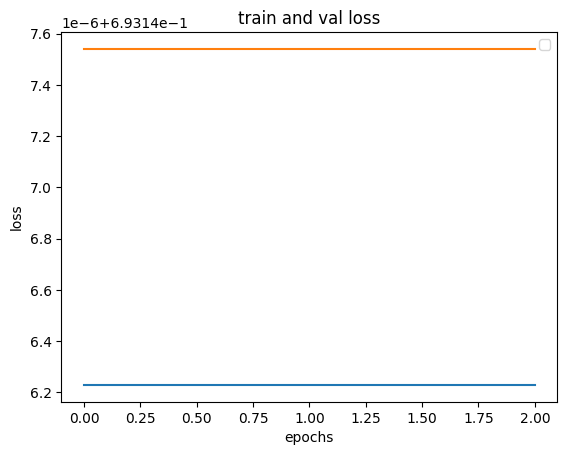

In [141]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('train and val loss')
plt.legend()
plt.show()

In [144]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


y_prob = model.predict(test_dataset.batch(16))
y_pred = np.argmax(y_prob.logits, axis=1)

y_pred

44/44 [==============================] - 22s 489ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [146]:
cm = confusion_matrix(y_test, y_pred)

In [147]:
cm

array([[495,   0],
       [199,   0]], dtype=int64)

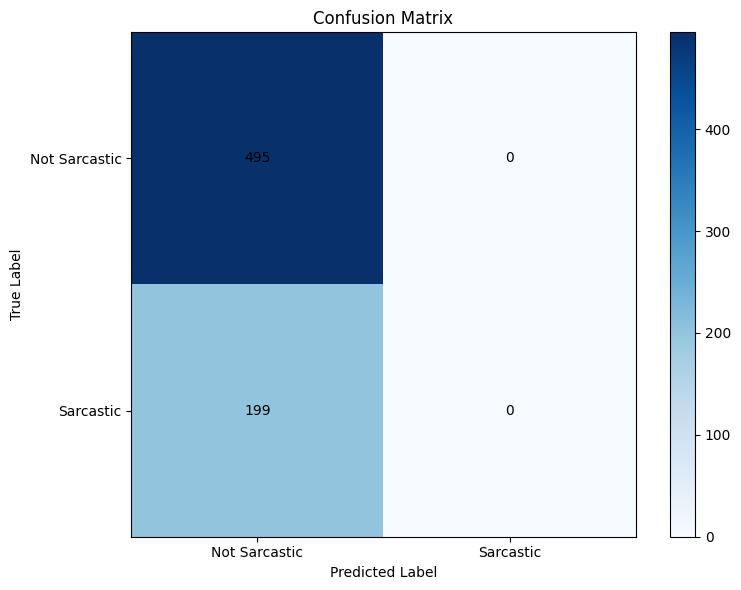

In [148]:
# plot the confusion confusion_matrix

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2) #assuming you have binary classification (0 and 1)
plt.xticks(tick_marks, ['Not Sarcastic', 'Sarcastic'])
plt.yticks(tick_marks, ['Not Sarcastic', 'Sarcastic'])


thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [149]:
classification_report(y_test, y_pred)

c:\Users\Jay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

'              precision    recall  f1-score   support\n\n           0       0.71      1.00      0.83       495\n           1       0.00      0.00      0.00       199\n\n    accuracy                           0.71       694\n   macro avg       0.36      0.50      0.42       694\nweighted avg       0.51      0.71      0.59       694\n'

In [151]:
model.save_pretrained("my_distil_bert")

In [152]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained('my_distil_bert')

Some layers from the model checkpoint at my_distil_bert were not used when initializing TFDistilBertForSequenceClassification: ['dropout_59']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at my_distil_bert and are newly initialized: ['dropout_79']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Predictive System

In [159]:
def predictive(text):
    text = preprocess_text(text)
    inputs = tokenizer(text, padding=True, truncation=True, max_length= max_length, return_tensors='tf')
    logits = loaded_model(inputs).logits

    probabilities = tf.nn.softmax(logits, axis=1).numpy()
    predicted_label = np.argmax(probabilities, axis=1)

    return predicted_label



In [160]:
text = "the only thing i got from college is a caffeine addiction"
predicted_label = predictive(text)
predicted_label

array([0], dtype=int64)

In [158]:
df['sarcastic'][0]
df['cleaned_tweet'][0]

'the only thing i got from college is a caffeine addiction'